# Importo le librerie necessarie

In [1]:
import DS_functions as df
from DS_functions import steam as steam

# INTRODUCTION


 - RICORDARSI DI LEVARE RIGA TIMEDELTA NEGATIVA  <- COMMENTO SU QUESTA COSA


 - da dove è stato preso il database

 - di cosa parla il database

 - il nostro obiettivo




# [**RQ1**] Exploratory Data Analysis (EDA)

spiegazione


In [2]:
steam.head(3)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1 days 07:49:00,1 days 00:08:00,1 days 07:49:00,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,1 days 22:04:00,1 days 21:43:00,1 days 20:34:00,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,0 days 17:41:00,0 days 17:41:00,0 days 17:40:00,2021-01-23 06:36:17


questo è l'elenco completo delle colonne del database ... notare degli elemnti nulli bla bla

In [3]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Dtype          
---  ------                          -----          
 0   app_id                          int64          
 1   app_name                        object         
 2   review_id                       int64          
 3   language                        object         
 4   review                          object         
 5   timestamp_created               datetime64[ns] 
 6   timestamp_updated               datetime64[ns] 
 7   recommended                     bool           
 8   votes_helpful                   int64          
 9   votes_funny                     int64          
 10  weighted_vote_score             float64        
 11  comment_count                   int64          
 12  steam_purchase                  bool           
 13  received_for_free               bool           
 14  written_during_early_access     

spiegazione delle colonne

commento sugli elementi nulli

In [ ]:
#df.nullHeatMap()

qui si possono vedere alcuni dati importanti del dataset...

In [ ]:
round(steam.iloc[:,[8,9,10,11,16,17,18,19,20]].describe(),3)

In [ ]:
df.statisticalIndex() ##Da modificare

descrizione breve e poi: "Questo argomento verrà approfondito più avanti"

In [ ]:
df.numbersOfReviewsByApplication(15)

Numero di review per lingua: come sopra

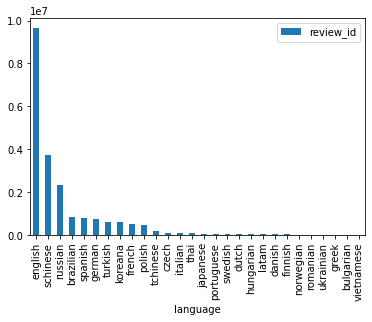

In [9]:
t =steam[["language", "review_id"]].groupby(["language"], as_index = False).count().sort_values("review_id", ascending=False)
t.plot.bar('language','review_id');

Porzione di recensioni in cui il gioco è stato acquistato o non su steam

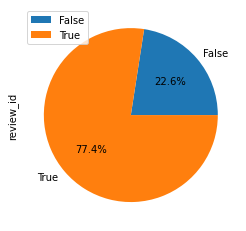

In [10]:
sp=steam[['steam_purchase','review_id']].groupby('steam_purchase').count()
sp.plot.pie(y='review_id',autopct='%1.1f%%');

Porzione di recensione in cui il gioco recensito viene raccomandato e non

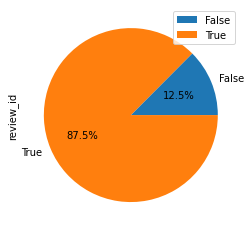

In [11]:
rec=steam[['recommended','review_id']].groupby('recommended').count()
rec.plot.pie(y='review_id',autopct='%1.1f%%');

Porzione di recensioni in cui il gioco recensito viene ricevuto gratis

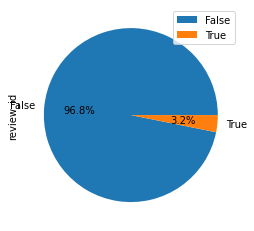

In [13]:
rff=steam[['received_for_free','review_id']].groupby('received_for_free').count()
rff.plot.pie(y='review_id',autopct='%1.1f%%');

porzione di recensioni riferite a giochi in accesso anticipato e non

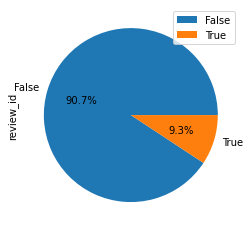

In [17]:
wea=steam[['written_during_early_access','review_id']].groupby('written_during_early_access').count()
wea.plot.pie(y='review_id',autopct='%1.1f%%');

grafico bar con date e numero di recensioni (created update author last played) + grafico RQ3

# RQ2

In [ ]:
df.numbersOfReviewsByApplication(15)

In [ ]:
df.scoreOfApps(20)

In [ ]:
df.raccomendedApp_purchase_free(5, 3)

# RQ3

# RQ3 test

#### What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

La domanda che ci è stata posta non ha una risposta diretta. Per rispondere a quest'ultima, inizialmente abbiamo plotted, con la funzione richiesta nell'esercizio, il numero di recenzioni in intervalli di tempo da 15 minuti. In questa prima rappresentazione (figura 1) abbiamo notato due massimi: Il primo tra le 14 e le 16 ed il secondo tra le 18 e le 19. Tuttavia i bar del grafico in quegli intorni sono piuttosto costanti, quindi una rappresentazione con intervalli più larghi potrebbe rappresentare meglio i dati (figura 2).

## Forse la media?


In [ ]:
df.numbersOfReviewByTime([["0:00", "3:59"], ["4:00", "7:59"], ["8:00", "11:59"], ["12:00", "15:59"], ["16:00", "19:59"], ["20:00", "23:59"]]);
df.numbersOfReviewByTime(df.datetime_range24(delta = 60));
df.numbersOfReviewByTime(df.datetime_range24(delta = 15));

Ora applichiamo la funzione utilizzata precedentemente su i seguenti intervalli richiesti:
    
| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|

In [ ]:
df.numbersOfReviewByTime([["06:00:00", "10:59:59"],["11:00:00", "13:59:59"], ["14:00:00",  "16:59:59"], ["17:00:00", "19:59:59"], ["20:00:00", "23:59:59"], ["00:00:00", "02:59:59"],["03:00:00", "05:59:59"]]);

# RQ4

# RQ5

# RQ6

 # Average time (days and minutes) a user lets pass before he updates a review

In [ ]:
t = df.timedelta_updated_created()

Analizzando il DataFrame utilizzando la funzione "describe" si può reperire che la media

In [ ]:
t.describe()["mean"]

### NOTA

Analizzando i risultati della funzione describe si può inoltre notare la presenza di un dato errato nel dataset. Una riga del dataset possiede nel campo timestamp_created un valore maggiore rispetto al campo timestamp_updated.

In [ ]:
t.sort_values()

   - Plot the top 3 authors that usually update their reviews.
   
Top 3 utenti con più recensioni aggiornate (Questa lista non prende in considerazione il numero totale di recensioni per utente: un utente con più recensioni si troverà probabilmente più in alto in classifica)

In [ ]:
df.plotBestAuthor_updater(3)

Top 3 utenti con più recensioni aggiornate (Questa lista prende in considerazione il numero totale di recensioni e il numero di recensioni aggiornate)

In [ ]:
df.numberOfUpdateAndNonUpdateByAuthor(3)

# RQ7

In [ ]:
df.probabilityQuestion1()

In [ ]:
df.probabilityQuestion2()

In [ ]:
df.probabilityQuestion3()